In [2]:
import boto3
import botocore
import sagemaker
import sys


bucket = 'ads-bucket-senichol'   # <--- specify a bucket you have access to
prefix = 'kaggle-crypto-data/RCF'
execution_role = sagemaker.get_execution_role()


# check if the bucket exists
try:
    boto3.Session().client('s3').head_bucket(Bucket=bucket)
except botocore.exceptions.ParamValidationError as e:
    print('Hey! You either forgot to specify your S3 bucket'
          ' or you gave your bucket an invalid name!')
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] == '403':
        print("Hey! You don't have permission to access the bucket, {}.".format(bucket))
    elif e.response['Error']['Code'] == '404':
        print("Hey! Your bucket, {}, doesn't exist!".format(bucket))
    else:
        raise
else:
    print('Training input/output will be stored in: s3://{}/{}'.format(bucket, prefix))

Training input/output will be stored in: s3://ads-bucket-senichol/kaggle-crypto-data/RCF


In [3]:
import pandas as pd
#!pip install kaggle
#!kaggle datasets download -d mczielinski/bitcoin-historical-data
#!mkdir bitcoin-historical-data
#!mv bitcoin-historical-data.zip /bitcoin-historical-data
#!unzip -a /bitcoin-historical-data/bitcoin-historical-data.zip
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-06-27.csv', encoding="ISO-8859-1", low_memory=False)


In [6]:
from datetime import datetime
# create various date formats for grouping later on
df['Time'] = pd.to_datetime(df['Timestamp'], unit = 's', infer_datetime_format = 'True')
df['Date'] = df['Time'].values.astype('datetime64[D]')
df['Hour'] = df['Time'].values.astype('datetime64[h]')
df['Minute'] = df['Time'].values.astype('datetime64[m]')

df.drop(columns=['Time', 'Timestamp'])

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Hour,Minute
0,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31,2011-12-31 07:00:00,2011-12-31 07:52:00
1,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31,2011-12-31 07:00:00,2011-12-31 07:53:00
2,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31,2011-12-31 07:00:00,2011-12-31 07:54:00
3,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31,2011-12-31 07:00:00,2011-12-31 07:55:00
4,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31,2011-12-31 07:00:00,2011-12-31 07:56:00
5,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31,2011-12-31 07:00:00,2011-12-31 07:57:00
6,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31,2011-12-31 07:00:00,2011-12-31 07:58:00
7,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31,2011-12-31 07:00:00,2011-12-31 07:59:00
8,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31,2011-12-31 08:00:00,2011-12-31 08:00:00
9,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31,2011-12-31 08:00:00,2011-12-31 08:01:00


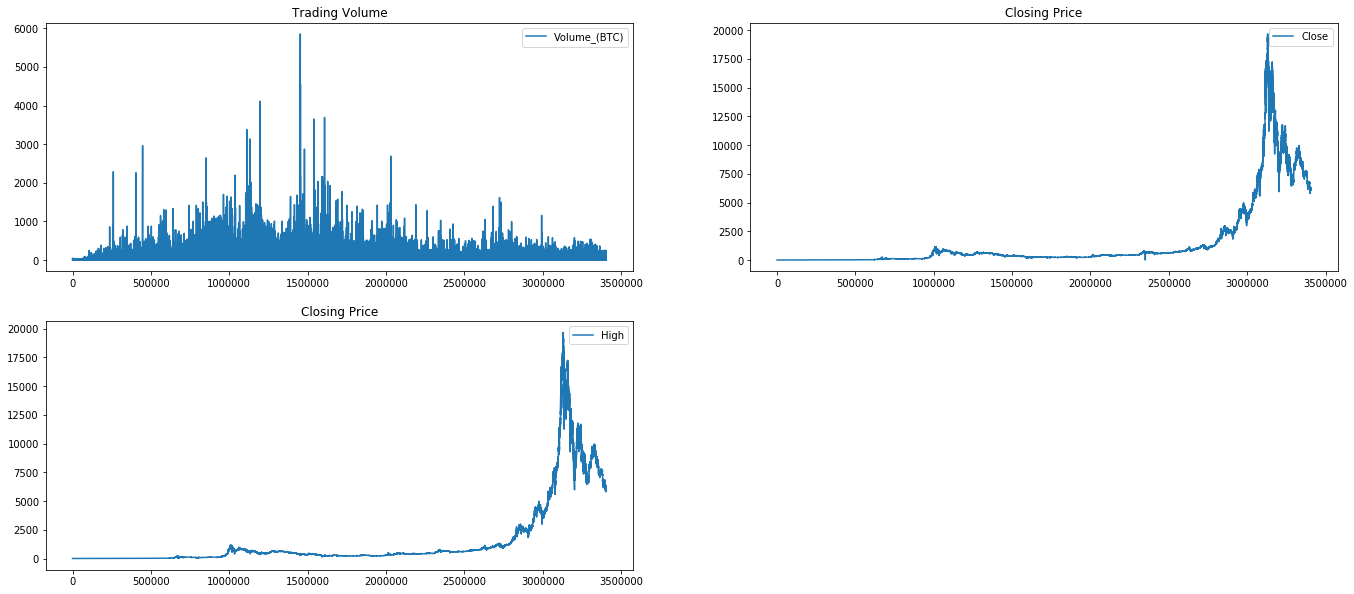

In [6]:
import matplotlib.pyplot as plt
# plot the minute-by-minute data
plt.subplot(221)
df['Volume_(BTC)'].plot(legend=True)
plt.title('Trading Volume')

plt.subplot(222)
df['Close'].plot(legend=True)
plt.title('Closing Price')

plt.subplot(223)
df['High'].plot(legend=True)
plt.title('Closing Price')

plt.subplots_adjust(left=0.01, right = 3, wspace=0.2, bottom = 0.1, top=2)

plt.show()


In [7]:
# grouping minute-by-minute data points by day to view the standard deviation of the features in the array below
df_std = df.groupby(['Date'])['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Weighted_Price'].std()
# removing '2018-06-27' because I know these values contain NA values and can't be used for training data.
df_std = df_std[df_std.index != '2018-06-27']

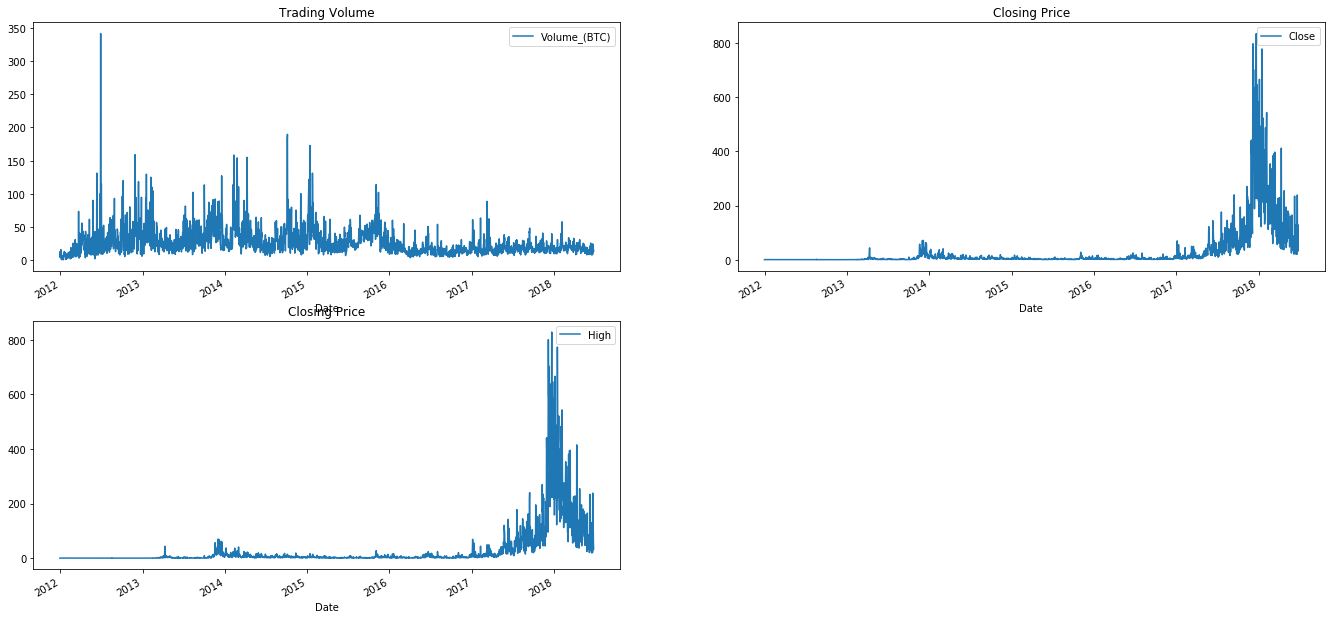

In [8]:
    # plotting the daily volatility measures
    plt.subplot(221)
    df_std['Volume_(BTC)'].plot(legend=True)
    plt.title('Trading Volume')

    plt.subplot(222)
    df_std['Close'].plot(legend=True)
    plt.title('Closing Price')

    plt.subplot(223)
    df_std['High'].plot(legend=True)
    plt.title('Closing Price')

    plt.subplots_adjust(left=0.01, right = 3, wspace=0.2, bottom = 0.1, top=2)

    plt.show()


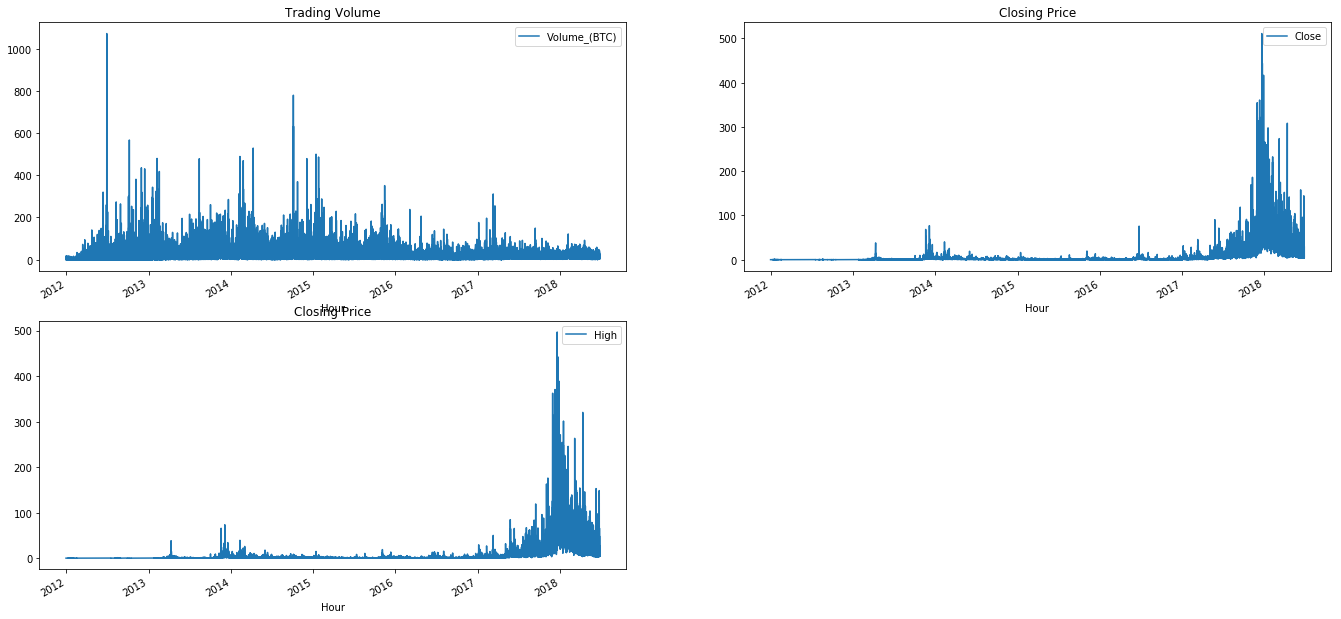

In [79]:
# grouping data by hour to measure hourly volatility
df_std_hourly = df.groupby(['Hour']).std()
plt.subplot(221)
df_std_hourly['Volume_(BTC)'].plot(legend=True)
plt.title('Trading Volume')

plt.subplot(222)
df_std_hourly['Close'].plot(legend=True)
plt.title('Closing Price')

plt.subplot(223)
df_std_hourly['High'].plot(legend=True)
plt.title('Closing Price')

plt.subplots_adjust(left=0.01, right = 3, wspace=0.2, bottom = 0.1, top=2)

plt.show()


In [115]:
from sagemaker import RandomCutForest

session = sagemaker.Session()

# specify general training job information
rcf = RandomCutForest(role=execution_role,
                      train_instance_count=1,
                      train_instance_type='ml.m4.xlarge',
                      data_location='s3://{}/{}/'.format(bucket, prefix),
                      output_path='s3://{}/{}/output'.format(bucket, prefix),
                      num_samples_per_tree=200,
                      num_trees=100)
# automatically upload the training data to S3 and run the training job
# (I have no idea what the ".reshape(-1,1)"" is doing. 
# I only got this to work by creating a dataframe that mimicked the taxi_data dataframe and copying slavishly.)
rcf.fit(rcf.record_set(df_std.values))

INFO:sagemaker:Creating training-job with name: randomcutforest-2018-09-29-20-56-27-013


2018-09-29 20:56:27 Starting - Starting the training job...
Launching requested ML instances...
Preparing the instances for training......
2018-09-29 20:57:59 Downloading - Downloading input data
2018-09-29 20:58:08 Training - Downloading the training image.....
Docker entrypoint called with argument(s): train
[09/29/2018 20:59:06 INFO 140025625515840] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'_ftp_port': 8999, u'num_samples_per_tree': 256, u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'_log_level': u'info', u'_kvstore': u'dist_async', u'force_dense': u'true', u'epochs': 1, u'num_trees': 100, u'eval_metrics': [u'accuracy', u'precision_recall_fscore'], u'_num_kv_servers': u'auto', u'mini_batch_size': 1000}
[09/29/2018 20:59:06 INFO 140025625515840] Reading provided configuration from /opt/ml/input/config/hyperparameters.json: {u'mini_batch_size': u'1000', u'feature_dim': u'6', u'num_samples_per_tree':


2018-09-29 20:59:09 Uploading - Uploading generated training model
2018-09-29 20:59:14 Completed - Training job completed
Billable seconds: 75


In [116]:
rcf_inference = rcf.deploy(
    initial_instance_count=1,
    instance_type='ml.m4.xlarge',
)

INFO:sagemaker:Creating model with name: randomcutforest-2018-09-29-21-01-46-894
INFO:sagemaker:Creating endpoint with name randomcutforest-2018-09-29-20-56-27-013


--------------------------------------------------------------!

In [117]:

from sagemaker.predictor import csv_serializer, json_deserializer

rcf_inference.content_type = 'text/csv'
rcf_inference.serializer = csv_serializer
rcf_inference.accept = 'application/json'
rcf_inference.deserializer = json_deserializer

In [134]:

df_std_numpy = df_std.as_matrix()

#print(df_std_numpy[:6])


844.053217953901

In [159]:
results = rcf_inference.predict(df_std_numpy)
scores = [datum['score'] for datum in results['scores']]

# add scores to taxi data frame and print first few values
df_std['score'] = pd.Series(scores, index=df_std.index)
df_std.describe()

,Open,High,Low,Close,Volume_(BTC),Weighted_Price,score
count,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000
mean,28.754174,28.642632,28.852132,28.763746,26.644910,28.770256,1.944812
std,81.676950,81.325773,81.915487,81.667798,21.056891,81.685035,0.801982
min,0.000000,0.000000,0.000000,0.000000,0.236352,0.000000,1.231556
25%,0.834915,0.831698,0.850683,0.848555,13.708088,0.838932,1.376574
50%,2.899077,2.902781,2.944381,2.917672,20.743492,2.930358,1.583190
75%,11.758791,11.639957,11.922247,11.738219,33.600570,11.762217,2.239767
max,836.715679,827.634032,844.053218,835.495879,341.879912,835.459423,4.309880


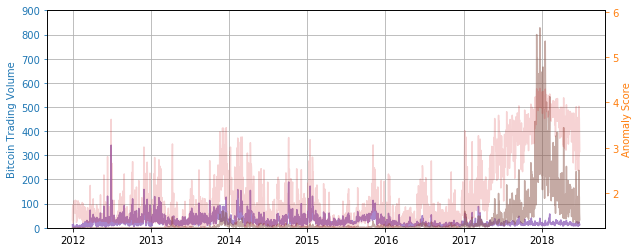

In [172]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#
# *Try this out* - change `start` and `end` to zoom in on the 
# anomaly found earlier in this notebook
#

ax1.plot(df_std['Volume_(BTC)'], color='C4', alpha=0.8)
ax1.plot(df_std['High'], color='C5', alpha=0.5)
ax2.plot(df_std['score'], color='C3', alpha=0.2)

ax1.grid(which='major', axis='both')

ax1.set_ylabel('Bitcoin Trading Volume', color='C0')
ax2.set_ylabel('Anomaly Score', color='C1')

ax1.tick_params('y', colors='C0')
ax2.tick_params('y', colors='C1')

ax1.set_ylim(0, 900)
ax2.set_ylim(min(scores), 1.4*max(scores))
fig.set_figwidth(10)


In [178]:
score_mean = df_std['score'].mean()
score_std = df_std['score'].std()
score_cutoff = score_mean + 2.5*score_std

anomalies = df_std[df_std['score'] > score_cutoff]
anomalies

(63, 7)

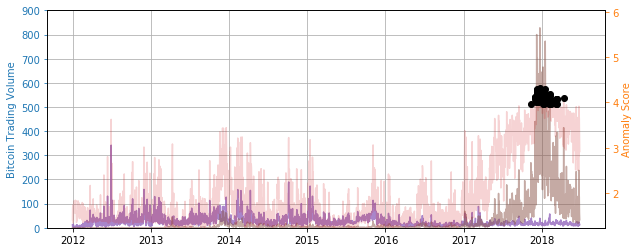

In [179]:
ax2.plot(anomalies.index, anomalies.score, 'ko')
fig
# high anomaly scores are highly concentrated around the end of 2017/beginning of 2018.

In [ ]:
sagemaker.Session().delete_endpoint(rcf_inference.endpoint)

In [19]:
from sagemaker import RandomCutForest
df_subset = df[['Minute','Open', 'Close', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']]
df_subset = df_subset.set_index(pd.DatetimeIndex(df_subset['Minute']).values)
df_subset = df_subset.drop(columns = ['Minute'])
session = sagemaker.Session()

# specify general training job information
rcf_minute = RandomCutForest(role=execution_role,
                      train_instance_count=1,
                      train_instance_type='ml.m4.xlarge',
                      data_location='s3://{}/{}/'.format(bucket, prefix),
                      output_path='s3://{}/{}/output'.format(bucket, prefix),
                      num_samples_per_tree=200,
                      num_trees=100)
# automatically upload the training data to S3 and run the training job
# (I have no idea what the ".reshape(-1,1)"" is doing. 
# I only got this to work by creating a dataframe that mimicked the taxi_data dataframe and copying slavishly.)
rcf_minute.fit(rcf_minute.record_set(df_subset.values))

INFO:sagemaker:Creating training-job with name: randomcutforest-2018-09-30-00-39-24-282


2018-09-30 00:39:24 Starting - Starting the training job...
Launching requested ML instances...
Preparing the instances for training......
2018-09-30 00:41:02 Downloading - Downloading input data
2018-09-30 00:41:09 Training - Downloading the training image......
2018-09-30 00:42:18 Uploading - Uploading generated training model
2018-09-30 00:42:24 Completed - Training job completed

Docker entrypoint called with argument(s): train
[09/30/2018 00:42:09 INFO 140079800817472] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'_ftp_port': 8999, u'num_samples_per_tree': 256, u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'_log_level': u'info', u'_kvstore': u'dist_async', u'force_dense': u'true', u'epochs': 1, u'num_trees': 100, u'eval_metrics': [u'accuracy', u'precision_recall_fscore'], u'_num_kv_servers': u'auto', u'mini_batch_size': 1000}
[09/30/2018 00:42:09 INFO 140079800817472] Reading provided configuration 

Billable seconds: 82


In [ ]:
rcf_inference = rcf_minute.deploy(
    initial_instance_count=1,
    instance_type='ml.m4.xlarge',
)



INFO:sagemaker:Creating model with name: randomcutforest-2018-09-30-00-43-39-918
INFO:sagemaker:Creating endpoint with name randomcutforest-2018-09-30-00-39-24-282


---------

In [17]:
from sagemaker.predictor import csv_serializer, json_deserializer

rcf_inference.content_type = 'text/csv'
rcf_inference.serializer = csv_serializer
rcf_inference.accept = 'application/json'
rcf_inference.deserializer = json_deserializer

Minute               datetime64[ns]
Open                        float64
Close                       float64
High                        float64
Low                         float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
dtype: object

In [18]:
df_std_numpy = df_std.as_matrix()
results = rcf_inference.predict(df_std_numpy)
scores = [datum['score'] for datum in results['scores']]

# add scores to taxi data frame and print first few values
df_std['score'] = pd.Series(scores, index=df_std.index)
df_std.describe()

,Minute,Open,Close,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price
2011-12-31 07:52:00,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:54:00,2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:55:00,2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:56:00,2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
